In [1]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install python-dotenv


Note: you may need to restart the kernel to use updated packages.


# 1. Îç∞Ïù¥ÌÑ∞ ÏàòÏßë

### 2024ÎÖÑ ÎπÑÌä∏ÏΩîÏù∏ ÏãúÏÑ∏ Îç∞Ïù¥ÌÑ∞
- UpbitÏóêÏÑú APIÎ•º ÌôúÏö©

In [1]:
import requests
from datetime import datetime, timedelta

def fetch_upbit_daily_candles(market: str, from_date: str, to_date: str):
    url = "https://api.upbit.com/v1/candles/days"
    headers = {"accept": "application/json"}
    
    all_candles = []
    to = to_date

    while True:
        params = {
            "market": market,
            "count": 200,
            "to": to
        }
        response = requests.get(url, params=params, headers=headers)
        candles = response.json()

        # Ïò§Î•ò Ï≤òÎ¶¨
        if not isinstance(candles, list):
            print("Error:", candles)
            break

        for candle in candles:
            candle_date = candle['candle_date_time_utc'][:10]
            if candle_date < from_date:
                return all_candles  # Ï¢ÖÎ£å Ï°∞Í±¥
            all_candles.append(candle)

        # ÎßàÏßÄÎßâ Ï∫îÎì§Ïùò Ïù¥Ï†Ñ ÎÇ†ÏßúÎ°ú to Í∞±Ïã†
        last_date = datetime.strptime(candles[-1]['candle_date_time_utc'], "%Y-%m-%dT%H:%M:%S")
        to = (last_date - timedelta(days=1)).strftime("%Y-%m-%dT%H:%M:%S")

        # Ïù¥ÎØ∏ Ï∂©Î∂ÑÌûà Í∞ÄÏ†∏ÏôîÏùÑ Í≤ΩÏö∞
        if len(all_candles) >= 365:
            break

    return all_candles


In [2]:
import pandas as pd

# 2024ÎÖÑ ÎπÑÌä∏ÏΩîÏù∏ ÏùºÎ¥â Îç∞Ïù¥ÌÑ∞ ÏöîÏ≤≠
market = "KRW-BTC"
from_date = "2024-01-01"
to_date = "2024-12-31T00:00:00"

btc_2024_data = fetch_upbit_daily_candles(market, from_date, to_date)

# Í≤∞Í≥º Ï∂úÎ†•
btc_df = pd.DataFrame(btc_2024_data)
display(btc_df)

market candle_date_time_utc candle_date_time_kst  opening_price  \
0    KRW-BTC  2024-12-30T00:00:00  2024-12-30T09:00:00    139831000.0   
1    KRW-BTC  2024-12-29T00:00:00  2024-12-29T09:00:00    142306000.0   
2    KRW-BTC  2024-12-28T00:00:00  2024-12-28T09:00:00    142107000.0   
3    KRW-BTC  2024-12-27T00:00:00  2024-12-27T09:00:00    144016000.0   
4    KRW-BTC  2024-12-26T00:00:00  2024-12-26T09:00:00    148216000.0   
..       ...                  ...                  ...            ...   
359  KRW-BTC  2024-01-05T00:00:00  2024-01-05T09:00:00     59477000.0   
360  KRW-BTC  2024-01-04T00:00:00  2024-01-04T09:00:00     58581000.0   
361  KRW-BTC  2024-01-03T00:00:00  2024-01-03T09:00:00     60205000.0   
362  KRW-BTC  2024-01-02T00:00:00  2024-01-02T09:00:00     58839000.0   
363  KRW-BTC  2024-01-01T00:00:00  2024-01-01T09:00:00     57045000.0   

      high_price    low_price  trade_price      timestamp  \
0    140680000.0  135971000.0  137892000.0  1735603199382   
1    142380000.0  138600000.0  139735000.0  1735516799943   
2    143000000.0  141487000.0  142302000.0  1735430399613   
3    146117000.0  141466000.0  142111000.0  1735343999444   
4    149000000.0  143175000.0  144076000.0  1735257600013   
..           ...          ...          ...            ...   
359   59695000.0   57577000.0   59351000.0  1704499198889   
360   60162000.0   57319000.0   59477000.0  1704412798132   
361   60799000.0   54346000.0   58581000.0  1704326399884   
362   60997000.0   58814000.0   60206000.0  1704239999808   
363   58847000.0   57045000.0   58839000.0  1704153599562   

     candle_acc_trade_price  candle_acc_trade_volume  prev_closing_price  \
0              5.208487e+11              3767.669781         139735000.0   
1              3.065153e+11              2180.406377         142302000.0   
2              1.863486e+11              1311.563873         142111000.0   
3              4.646690e+11              3231.263284         144076000.0   
4              4.991777e+11              3432.784430         148081000.0   
..                      ...                      ...                 ...   
359            2.843524e+11              4822.389677          59477000.0   
360            3.660256e+11              6254.537687          58581000.0   
361            9.458412e+11             16310.306926          60206000.0   
362            4.950388e+11              8221.198684          58839000.0   
363            1.824912e+11              3165.320929          57047000.0   

     change_price  change_rate  
0      -1843000.0    -0.013189  
1      -2567000.0    -0.018039  
2        191000.0     0.001344  
3      -1965000.0    -0.013639  
4      -4005000.0    -0.027046  
..            ...          ...  
359     -126000.0    -0.002118  
360      896000.0     0.015295  
361    -1625000.0    -0.026991  
362     1367000.0     0.023233  
363     1792000.0     0.031413  

[364 rows x 13 columns]

In [3]:
btc_df.to_csv("btc_2024.csv", index=False, encoding="utf-8-sig")

### 2024ÎÖÑ ÎÇ†Ïî® Îç∞Ïù¥ÌÑ∞
- Í∏∞ÏÉÅÏ≤≠(KMA) API ÌôúÏö©

In [6]:
import pandas as pd
import requests
from io import StringIO
from datetime import datetime, timedelta
import time
import os

def fetch_weather_for_date(date: datetime, station: str = "108") -> dict:
    url = "https://apihub.kma.go.kr/api/typ01/url/kma_sfctm2.php"
    AUTH_KEY = os.getenv("KMA_API_KEY")

    tm = date.strftime("%Y%m%d0900")  # Ïò§Ï†Ñ 9Ïãú Í∏∞Ï§Ä Í¥ÄÏ∏°

    params = {
        "tm": tm,
        "stn": station,
        "authKey": AUTH_KEY
    }

    try:
        response = requests.get(url, params=params, timeout=15)
        lines = response.text.split("\n")

        header_line = next(line for line in lines if line.startswith("# YYMMDD"))
        data_line = next(line for line in lines if not line.startswith("#") and line.strip())

        columns = header_line[1:].strip().split()
        values = data_line.strip().split()

        return dict(zip(columns, values))

    except Exception as e:
        print(f"[{tm}] ÏöîÏ≤≠ Ïã§Ìå®: {e}")
        time.sleep(2)  # Ïû†Ïãú Ïâ¨ÏóàÎã§Í∞Ä
        return fetch_weather_for_date(date)  # Ïû¨ÏãúÎèÑ (ÏµúÎåÄ 1Ìöå Îì± Ï†úÌïú Í∞ÄÎä•)

def fetch_weather_2024():
    start_date = datetime(2024, 1, 1)
    end_date = datetime(2024, 12, 31)
    current = start_date

    results = []

    while current <= end_date:
        weather_data = fetch_weather_for_date(current)
        if weather_data:
            results.append(weather_data)
        current += timedelta(days=1)

    df = pd.DataFrame(results)
    return df

In [ ]:
# Ïã§Ìñâ
weather_2024_df = fetch_weather_2024()

[202401010900] ÏöîÏ≤≠ Ïã§Ìå®: HTTPSConnectionPool(host='apihub.kma.go.kr', port=443): Read timed out. (read timeout=15)


KeyboardInterrupt: 

In [ ]:
display(weather_2024_df)

In [ ]:
weather_2024_df.to_csv("weather_2024_seoul.csv", index=False, encoding="utf-8-sig")

In [ ]:
# ÏöîÏ≤≠ Ïã§Ìå® Îç∞Ïù¥ÌÑ∞Îßå Îî∞Î°ú Í∞ÄÏ†∏Ïò§Í∏∞
# failed_dates = [
#     "20240101", "20240102",
#     "20240311", "20241003", "20241004"
# ]

# results = []
# for date_str in failed_dates:
#       dt = datetime.strptime(date_str, "%Y%m%d")
#       data = fetch_weather_for_date(dt)
#       if data:
#           results.append(data)
  
# retry_df = pd.DataFrame(results)

# display(retry_df)

# 2. Îç∞Ïù¥ÌÑ∞ Ï†ïÏ†ú Î∞è Ï†ÑÏ≤òÎ¶¨

1. ÌïÑÏöîÌïú Ïª¨ÎüºÎßå Ï∂îÏ∂ú Î∞è Î¶¨ÎÑ§Ïù¥Î∞ç
2. `date` Í∏∞Ï§Ä Î≥ëÌï©
3. Í±∞ÎûòÍ∏àÏï°Îãπ ÌèâÍ∑† Í∞ÄÍ≤© Ïª¨Îüº ÏÉùÏÑ±

In [7]:
import pandas as pd

weather_df = pd.read_csv("weather_2024_seoul.csv", encoding="utf-8-sig")
btc_df = pd.read_csv("btc_2024.csv", encoding="utf-8-sig")

In [8]:
keep_columns = [
    "YYMMDDHHMI",  # ÎÇ†Ïßú Í∏∞Ï§Ä mergeÏö©
    "TA",          # Í∏∞Ïò®
    "HM",          # ÏäµÎèÑ
    "WS",          # ÌíçÏÜç
    "SS",          # ÏùºÏ°∞ÏãúÍ∞Ñ
    "WW"           # ÎÇ†Ïî®ÏΩîÎìú (ÌùêÎ¶º, ÎßëÏùå Îì±)
]

# weather_2024_df: Í∏∞Ï°¥ ÏàòÏßëÎêú Ï†ÑÏ≤¥ ÎÇ†Ïî® Îç∞Ïù¥ÌÑ∞
filtered_weather = weather_df[keep_columns].copy()
filtered_weather.rename(columns={
    "YYMMDDHHMI": "datetime",
    "TA": "temperature",
    "HM": "humidity",
    "WS": "wind_speed",
    "RN_DAY": "rainfall",
    "SS": "sunshine_hours",
    "WW": "weather_code"
}, inplace=True)

# datetime ÌÉÄÏûÖÏúºÎ°ú Î≥ÄÌôò
filtered_weather["date"] = pd.to_datetime(filtered_weather["datetime"], format="%Y%m%d%H%M")
filtered_weather.drop(columns=["datetime"], inplace=True)

# Í≤∞Í≥º ÌôïÏù∏
filtered_weather.head(2)

temperature  humidity  wind_speed  sunshine_hours weather_code  \
0          2.1      85.0         2.0             0.0         1901   
1         -1.8      84.0         2.6             0.0           19   

                 date  
0 2024-01-03 09:00:00  
1 2024-01-04 09:00:00

In [9]:
keep_columns = [
    "candle_date_time_kst",     # Ï∫îÎì§ Í∏∞Ï§Ä ÏãúÍ∞Å(KST Í∏∞Ï§Ä)
    "opening_price",            # ÏãúÍ∞Ä  
    "high_price",               # Í≥†Í∞Ä
    "low_price",                # Ï†ÄÍ∞Ä  
    "trade_price",              # Ï¢ÖÍ∞Ä
    "candle_acc_trade_volume",  # ÎàÑÏ†Å Í±∞ÎûòÎüâ
    "candle_acc_trade_price"    # ÎàÑÏ†Å Í±∞Îûò Í∏àÏï°
]

# ÌïÑÌÑ∞ÎßÅ
filtered_btc = btc_df[keep_columns].copy()
filtered_btc["date"] = pd.to_datetime(filtered_btc["candle_date_time_kst"])

filtered_btc.head(2)

candle_date_time_kst  opening_price   high_price    low_price  trade_price  \
0  2024-12-30T09:00:00    139831000.0  140680000.0  135971000.0  137892000.0   
1  2024-12-29T09:00:00    142306000.0  142380000.0  138600000.0  139735000.0   

   candle_acc_trade_volume  candle_acc_trade_price                date  
0              3767.669781            5.208487e+11 2024-12-30 09:00:00  
1              2180.406377            3.065153e+11 2024-12-29 09:00:00

In [10]:
filtered_weather.sort_values(by="date", inplace=True)
filtered_btc.sort_values(by="date", inplace=True)

display(filtered_weather.head())
display(filtered_btc.head())

temperature  humidity  wind_speed  sunshine_hours weather_code  \
0          2.1      85.0         2.0             0.0         1901   
1         -1.8      84.0         2.6             0.0           19   
2          5.1      88.0         0.8             0.0           19   
3         -2.0      63.0         1.9             1.0            -   
4         -4.6      57.0         3.1             0.9            -   

                 date  
0 2024-01-03 09:00:00  
1 2024-01-04 09:00:00  
2 2024-01-05 09:00:00  
3 2024-01-06 09:00:00  
4 2024-01-07 09:00:00

candle_date_time_kst  opening_price  high_price   low_price  trade_price  \
363  2024-01-01T09:00:00     57045000.0  58847000.0  57045000.0   58839000.0   
362  2024-01-02T09:00:00     58839000.0  60997000.0  58814000.0   60206000.0   
361  2024-01-03T09:00:00     60205000.0  60799000.0  54346000.0   58581000.0   
360  2024-01-04T09:00:00     58581000.0  60162000.0  57319000.0   59477000.0   
359  2024-01-05T09:00:00     59477000.0  59695000.0  57577000.0   59351000.0   

     candle_acc_trade_volume  candle_acc_trade_price                date  
363              3165.320929            1.824912e+11 2024-01-01 09:00:00  
362              8221.198684            4.950388e+11 2024-01-02 09:00:00  
361             16310.306926            9.458412e+11 2024-01-03 09:00:00  
360              6254.537687            3.660256e+11 2024-01-04 09:00:00  
359              4822.389677            2.843524e+11 2024-01-05 09:00:00

In [11]:
filtered_btc["avg_trade_price_per_btc"] = (
    filtered_btc["candle_acc_trade_price"] / filtered_btc["candle_acc_trade_volume"]
)

# 3. ÌÉêÏÉâÏ†Å Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù (EDA)
1. ÏÉÅÍ¥ÄÍ≥ÑÏàò Î∂ÑÏÑù (Ï†ÑÏ≤¥) : pairplot, heatmap
2. ÏãúÍ≥ÑÏó¥ Í∑∏ÎûòÌîÑ (Ïò®ÎèÑ, Í±∞ÎûòÎüâ, Í∞ÄÍ≤© Îì±) : Ï∂îÏÑ∏ ÎπÑÍµê
3. Ïó∞Îßê/ÎπÑÏó∞Îßê ÏãúÏ¶å Î≥Ñ Î∂ÑÏÑù

In [12]:
filtered_btc.head(2)

candle_date_time_kst  opening_price  high_price   low_price  trade_price  \
363  2024-01-01T09:00:00     57045000.0  58847000.0  57045000.0   58839000.0   
362  2024-01-02T09:00:00     58839000.0  60997000.0  58814000.0   60206000.0   

     candle_acc_trade_volume  candle_acc_trade_price                date  \
363              3165.320929            1.824912e+11 2024-01-01 09:00:00   
362              8221.198684            4.950388e+11 2024-01-02 09:00:00   

     avg_trade_price_per_btc  
363             5.765331e+07  
362             6.021492e+07

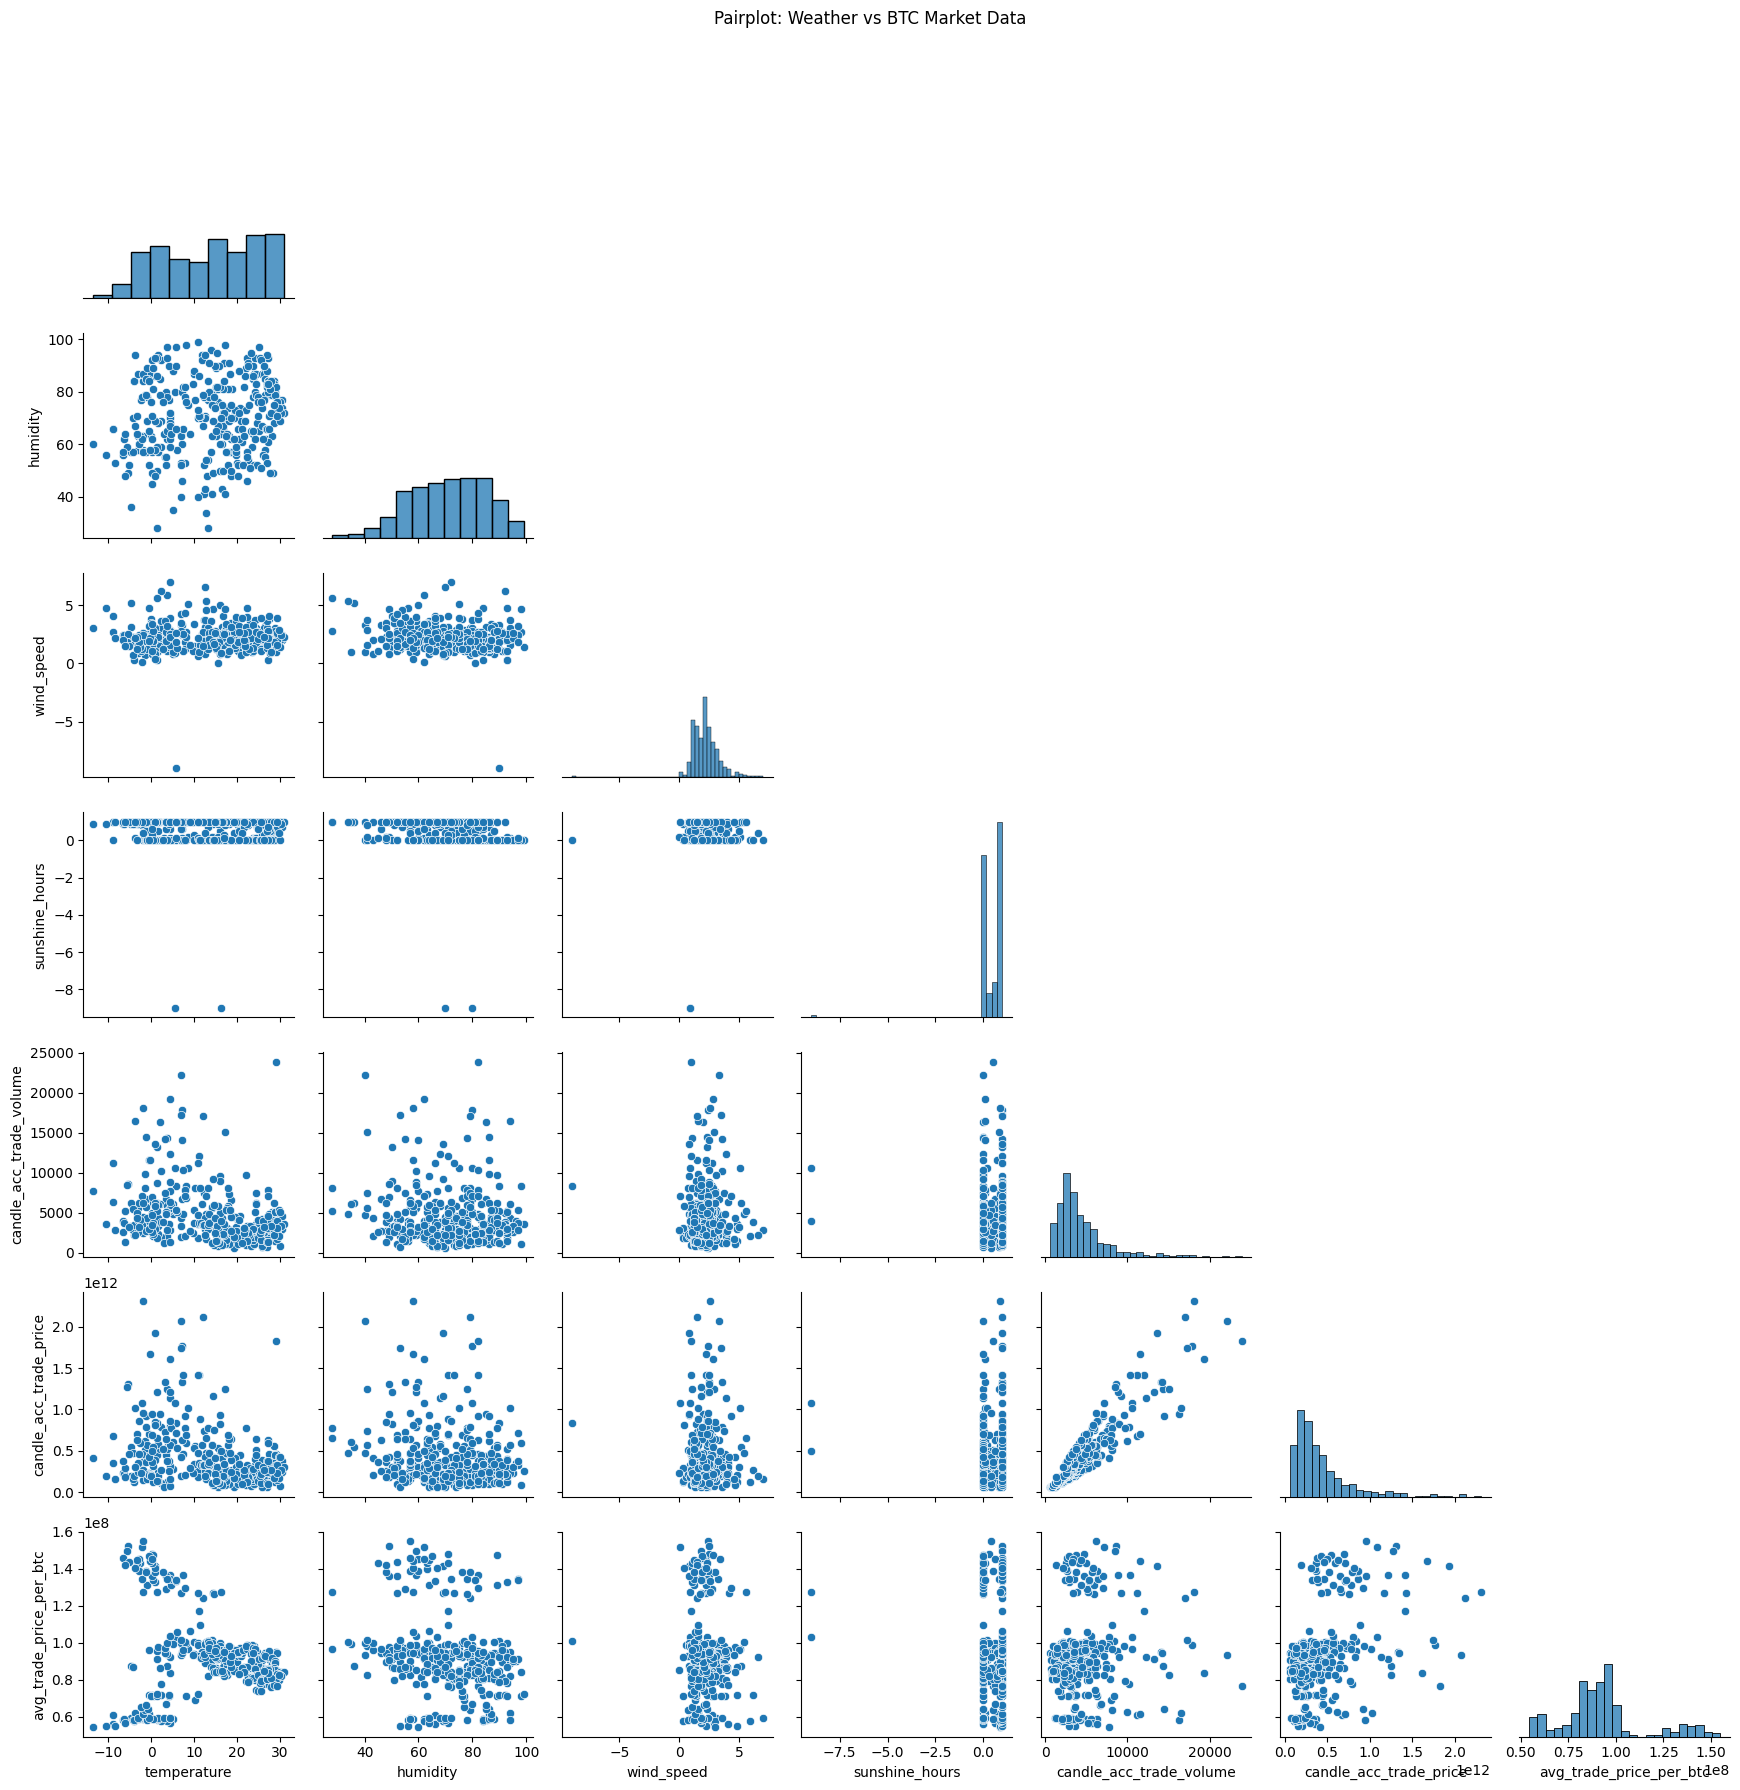

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# ÏÉÅÍ¥Ä Î∂ÑÏÑùÏóê ÏÇ¨Ïö©Ìï† Ïª¨Îüº Ï†ïÏùò
weather_cols = ["temperature", "humidity", "wind_speed", "sunshine_hours"]
btc_cols = ["candle_acc_trade_volume", "candle_acc_trade_price", "avg_trade_price_per_btc"]

# Í≥µÌÜµ ÎÇ†Ïßú Í∏∞Ï§Ä merge
merged_df = pd.merge(
    filtered_weather[["date"] + weather_cols],
    filtered_btc[["date"] + btc_cols],
    on="date", how="inner"
)

# pairplot ÏãúÍ∞ÅÌôî
sns.pairplot(merged_df[weather_cols + btc_cols], corner=True)
plt.suptitle("Pairplot: Weather vs BTC Market Data", y=1.02)
plt.tight_layout()
plt.show()


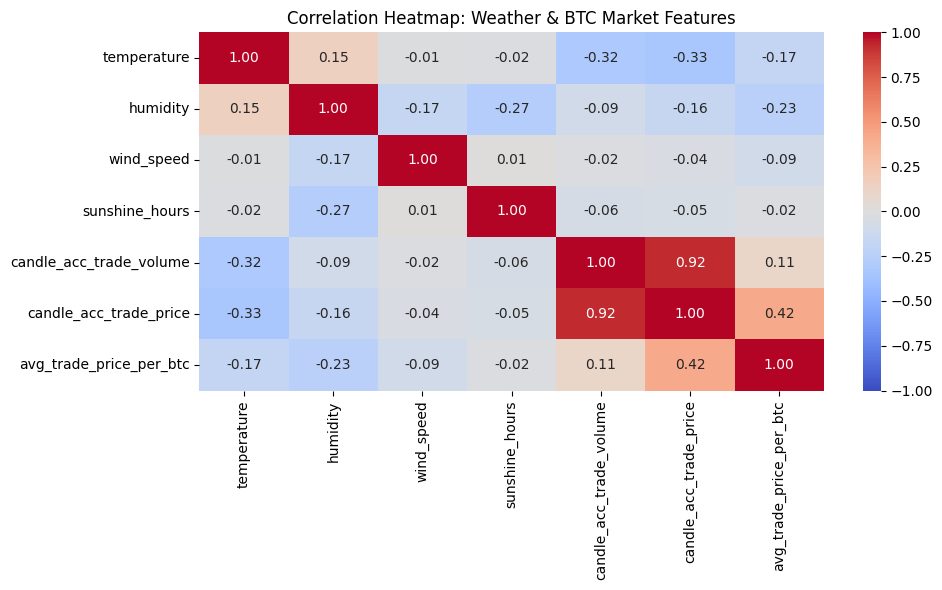

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌñâÎ†¨ Í≥ÑÏÇ∞
correlation_matrix = merged_df[weather_cols + btc_cols].corr()

# ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap: Weather & BTC Market Features")
plt.tight_layout()
plt.show()


## ÏπºÎüº Î≥Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÏóê ÎåÄÌï¥ Îç∞Ïù¥ÌÑ∞ Ï§ëÍ∞Ñ Î∂ÑÏÑù ÎÇ¥Ïö©

- `candle_acc_trade_price`ÏôÄ `avg_trade_price_per_btc` ÏÇ¨Ïù¥Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàòÎäî **0.42**Î°ú,  
  **Í±∞ÎûòÍ∏àÏï°Ïù¥ Ï¶ùÍ∞ÄÌï†ÏàòÎ°ù ÎπÑÌä∏ÏΩîÏù∏ ÌèâÍ∑† Í±∞Îûò Í∞ÄÍ≤©ÎèÑ Ìï®Íªò Ïò§Î•¥Îäî Í≤ΩÌñ•**Ïù¥ ÎÇòÌÉÄÎÇúÎã§.
- ÌïúÌé∏, `temperature`Îäî  
  - `candle_acc_trade_volume`,  
  - `candle_acc_trade_price`,  
  - `avg_trade_price_per_btc`  
  Î™®ÎëêÏôÄ **ÏùåÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ**Î•º Î≥¥Ïù∏Îã§.  

üëâ Ï¶â, **ÎÇ†Ïî®Í∞Ä Ï∂îÏö∏ÏàòÎ°ù ÎπÑÌä∏ÏΩîÏù∏ Í±∞ÎûòÎüâ, Í∏àÏï°, Í∞ÄÍ≤©Ïù¥ Ï¶ùÍ∞ÄÌïòÎäî Í≤ΩÌñ•**Ïù¥ Ï°¥Ïû¨ÌïúÎã§.


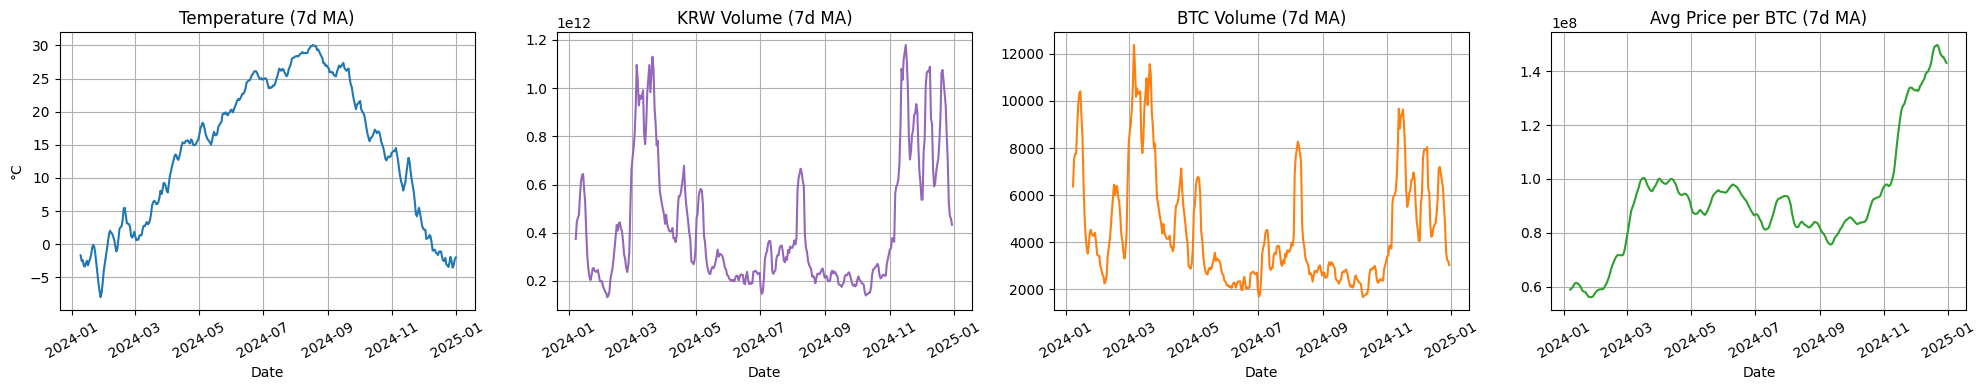

In [15]:
import matplotlib.pyplot as plt

# 7Ïùº Ïù¥Îèô ÌèâÍ∑† Í≥ÑÏÇ∞
filtered_weather['temperature_ma7'] = filtered_weather['temperature'].rolling(7).mean()
filtered_weather['humidity_ma7'] = filtered_weather['humidity'].rolling(7).mean()
filtered_btc['average_btc_ma7'] = filtered_btc['avg_trade_price_per_btc'].rolling(7).mean()
filtered_btc['volume_btc_ma7'] = filtered_btc['candle_acc_trade_volume'].rolling(7).mean()
filtered_btc['average_krw_ma7'] = filtered_btc['candle_acc_trade_price'].rolling(7).mean()

# Í∑∏ÎûòÌîÑ Ï†ÑÏ≤¥ Í∑∏Î¶¨Í∏∞: 1Ìñâ 4Ïó¥
fig, axes = plt.subplots(1, 4, figsize=(20, 4), sharex=True)

# Í∑∏ÎûòÌîÑ 1: Ïò®ÎèÑ
axes[0].plot(filtered_weather['date'], filtered_weather['temperature_ma7'], color='tab:blue')
axes[0].set_title("Temperature (7d MA)")
axes[0].set_ylabel("¬∞C")
axes[0].grid(True)

# Í∑∏ÎûòÌîÑ 2: KRW Í±∞Îûò Í∏àÏï°
axes[1].plot(filtered_btc['date'], filtered_btc['average_krw_ma7'], color='tab:purple')
axes[1].set_title("KRW Volume (7d MA)")
axes[1].grid(True)

# Í∑∏ÎûòÌîÑ 3: BTC Í±∞ÎûòÎüâ
axes[2].plot(filtered_btc['date'], filtered_btc['volume_btc_ma7'], color='tab:orange')
axes[2].set_title("BTC Volume (7d MA)")
axes[2].grid(True)

# Í∑∏ÎûòÌîÑ 4: ÌèâÍ∑† BTC Í∞ÄÍ≤©
axes[3].plot(filtered_btc['date'], filtered_btc['average_btc_ma7'], color='tab:green')
axes[3].set_title("Avg Price per BTC (7d MA)")
axes[3].grid(True)

# Í≥µÌÜµ XÏ∂ï Î†àÏù¥Î∏î
for ax in axes:
    ax.set_xlabel("Date")
    ax.tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()


In [16]:
import pandas as pd

# Ïó∞ÎßêÏó∞Ïãú Íµ¨Í∞Ñ: 11Ïõî, 12Ïõî, 1Ïõî
end_of_year = filtered_btc[filtered_btc['date'].dt.month.isin([11, 12, 1])]

# ÎπÑÏó∞Îßê Íµ¨Í∞Ñ: 2Ïõî ~ 10Ïõî
rest_of_year = filtered_btc[filtered_btc['date'].dt.month.isin(range(2, 11))]

# ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
corr_end_of_year = end_of_year[['candle_acc_trade_price', 'avg_trade_price_per_btc']].corr().iloc[0, 1]
corr_rest_of_year = rest_of_year[['candle_acc_trade_price', 'avg_trade_price_per_btc']].corr().iloc[0, 1]

# Ï∂úÎ†•
print(f"üìà Ïó∞ÎßêÏó∞Ïãú ÏÉÅÍ¥ÄÍ≥ÑÏàò (11~1Ïõî): {corr_end_of_year:.3f}")
print(f"üìâ ÎπÑÏó∞Îßê ÏÉÅÍ¥ÄÍ≥ÑÏàò (2~10Ïõî): {corr_rest_of_year:.3f}")


üìà Ïó∞ÎßêÏó∞Ïãú ÏÉÅÍ¥ÄÍ≥ÑÏàò (11~1Ïõî): 0.443
üìâ ÎπÑÏó∞Îßê ÏÉÅÍ¥ÄÍ≥ÑÏàò (2~10Ïõî): 0.217


# Ïù∏ÏÇ¨Ïù¥Ìä∏ Ï†ïÎ¶¨
1. **Ïó∞ÎßêÏó∞ÏãúÎäî ÏàòÏöî ÏßëÏ§ë ÏãúÍ∏∞**
  - ÏÉÅÍ¥ÄÍ≥ÑÏàò 0.443 <br/>
  ‚Üí 11Ïõî~1Ïõî ÏÇ¨Ïù¥, ÎπÑÌä∏ÏΩîÏù∏ÏùÑ Íµ¨Îß§ÌïòÎ†§Îäî ÏàòÏöîÍ∞Ä ÏßëÏ§ëÎêòÎ©¥ÏÑú  
  **Í∞ÄÍ≤© ÏÉÅÏäπÏúºÎ°ú Ïù¥Ïñ¥Ï°åÏùÑ Í∞ÄÎä•ÏÑ±**Ïù¥ ÏûàÎã§.
  Ìà¨Ïûê Ïã¨Î¶¨ÏôÄ Íµ¨Îß§ ÏàòÏöîÍ∞Ä Í∞ÄÍ≤© ÌòïÏÑ±Ïóê ÏòÅÌñ•ÏùÑ ÎØ∏Ï≥§ÏùÑ Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏùå.

2. **Í∏∞Ïò®Í≥º Ïò®ÎùºÏù∏ Ìà¨Ïûê ÌñâÎèô**  
   ‚Üí Ï∂îÏö¥ ÎÇ†Ïî®Í∞Ä Ïô∏Î∂Ä ÌôúÎèôÏùÑ Ï§ÑÏù¥Í≥† **Ïò®ÎùºÏù∏ ÌôúÎèô Î∞è ÏûêÏÇ∞ Ìà¨Ïûê ÏßëÏ§ë**ÏùÑ Ïú†ÎèÑÌñàÏùÑ Ïàò ÏûàÎã§.  
   ÌäπÌûà Ïó∞ÎßêÏóêÎäî **Ïó∞Ï¥à Í∏∞ÎåÄÍ∞ê, Î≥¥ÎÑàÏä§ ÏàòÎ†π, Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Ï°∞Ï†ï Îì±**Ïù¥ Ìà¨Ïûê Ïã¨Î¶¨Ïóê ÏòÅÌñ•ÏùÑ Ï§Ñ Ïàò ÏûàÎã§.

3. **ÎπÑÌä∏ÏΩîÏù∏Ïùò Í≥ÑÏ†àÏÑ± Í∞ÄÎä•ÏÑ±**  
   ‚Üí Ïù¥ Ìå®ÌÑ¥ÏùÄ ÎπÑÌä∏ÏΩîÏù∏Ïù¥ **Í∞ÑÏ†ëÏ†ÅÏù∏ Í≥ÑÏ†àÏÑ±(Seasonality)** ÏùÑ Í∞ÄÏßà Ïàò ÏûàÎã§Îäî Ïã†Ìò∏Ïùº Ïàò ÏûàÎã§.  
   ÌäπÏ†ï Í≥ÑÏ†à ÎòêÎäî ÏãúÍ∏∞(Ïó∞ÎßêÏó∞Ïãú)Ïóê **Í±∞ÎûòÎüâÍ≥º Í∞ÄÍ≤©Ïù¥ Ìï®Íªò Ïò§Î•¥Îäî Í≤ΩÌñ•**Ïù¥ Î∞òÎ≥µÎê† Ïàò ÏûàÎã§.

Í∏∞Ïò®Í≥º ÏãúÍ∏∞(Ïó∞ÎßêÏó∞Ïãú)Îäî ÎπÑÌä∏ÏΩîÏù∏ Í±∞Îûò ÌôúÎèôÏóê ÏùºÏ†ïÌïú ÏòÅÌñ•ÏùÑ ÎØ∏Ïπ† Ïàò ÏûàÏúºÎ©∞,  
Ïù¥Îäî **Îã®ÏàúÌïú Í∞ÄÍ≤© ÌùêÎ¶Ñ Ïù¥ÏÉÅÏùò Ìà¨ÏûêÏûê ÌñâÎèô Ïã¨Î¶¨ÏôÄ ÎßûÎ¨ºÎ†§ ÏûàÎäî Î≥µÌï©Ï†Å ÌòÑÏÉÅ**ÏúºÎ°ú Ìï¥ÏÑùÌï† Ïàò ÏûàÎã§.